In [1]:
import os

In [2]:
from transformers import Wav2Vec2Processor, Data2VecAudioModel
import torch
from torch import nn
from datasets import load_dataset
import numpy
import pandas
import seaborn
from sklearn import cluster
from matplotlib import pyplot
import sklearn
import pandas
from scipy.stats import kendalltau
import librosa
import hdbscan
from sklearn.cluster import AgglomerativeClustering
import cv2

In [3]:
d = './data_sub_mp3/'
listed = [os.path.abspath('{0}{1}'.format(d, x)) for x in os.listdir(d)]
'desktop.ini' in listed

False

In [4]:
[x for x in listed if 'desktop.ini' in x]

[]

In [5]:
listed[2]

'C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\sKqfeWQOOZk.mp3'

In [6]:
import librosa
audio_data = listed[0]
x, sr = librosa.load(audio_data, sr=None)
print(x.shape)
print(sr)

(3638250,)
44100


In [86]:
# Visualize

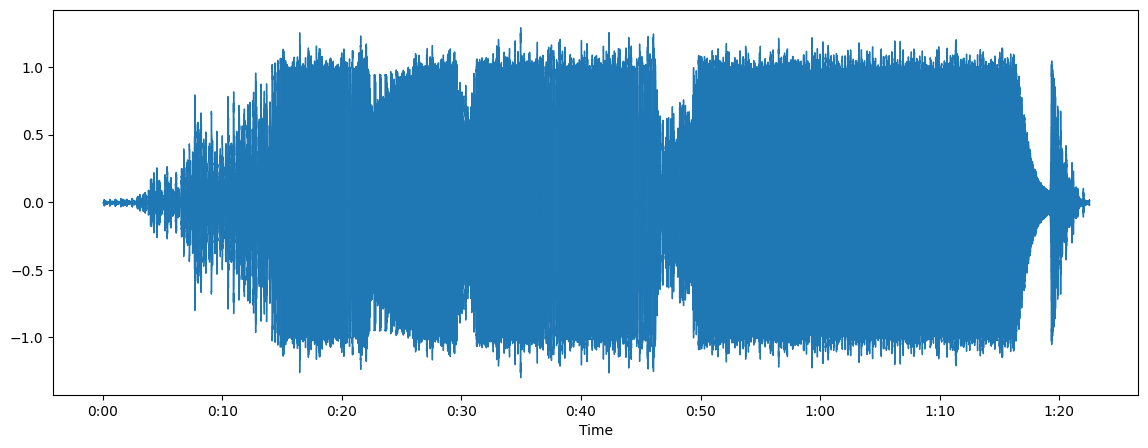

In [93]:
import librosa.display
pyplot.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [94]:
x.shape

(3175200,)

In [95]:
# Spectrogram

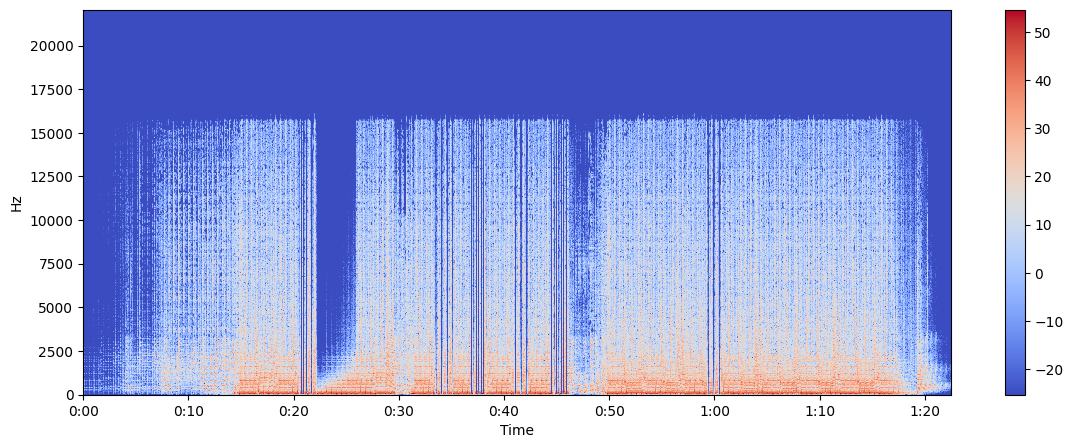

In [149]:
xx = librosa.stft(x)
xxdb = librosa.amplitude_to_db(abs(xx))
pyplot.figure(figsize=(14, 5))
librosa.display.specshow(xxdb, sr=sr, x_axis='time', y_axis='hz')
pyplot.colorbar()

In [13]:
xxdb.shape

(1025, 9480)

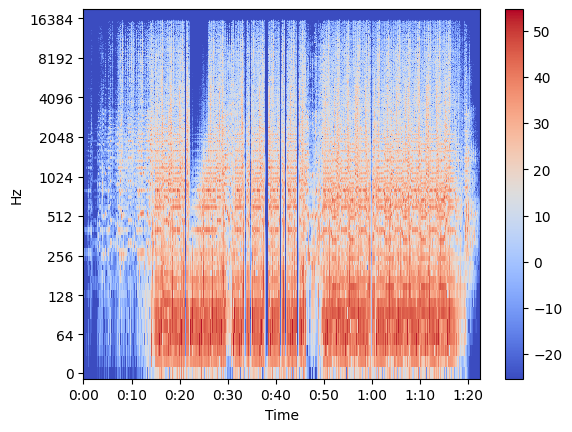

In [104]:
librosa.display.specshow(xxdb, sr=sr, x_axis='time', y_axis='log')
pyplot.colorbar()

In [15]:
# Spectral Centroid

In [16]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(9480,)

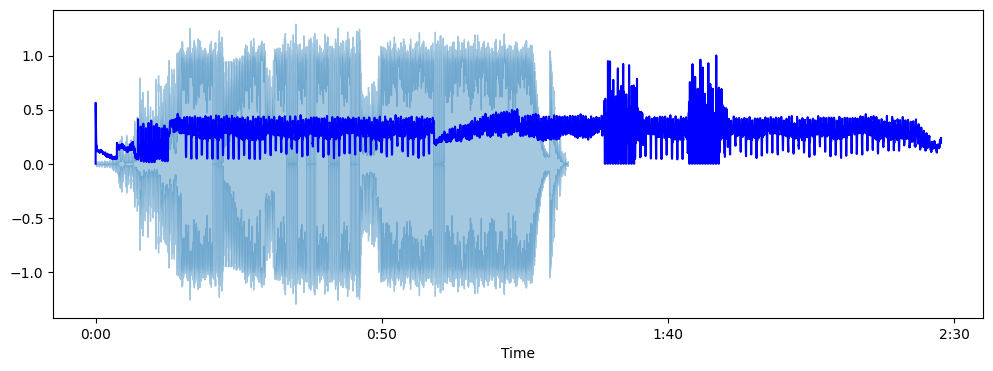

In [105]:
# Computing the time variable for visualization
# pyplot.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames) / 2                             # wat?
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
fig, ax = pyplot.subplots(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
ax.plot(t, normalize(spectral_centroids), color='b')
# librosa.display.waveshow(normalize(librosa.times_like(spectral_centroids)), sr=sr, color='b')
# ax.plot(librosa.times_like(spectral_centroids), normalize(spectral_centroids.T), color='b')

In [18]:
normalize(spectral_centroids).shape

(9480,)

In [19]:
spectral_centroids.shape

(9480,)

In [20]:
t.shape

(9480,)

In [21]:
x.shape

(4853646,)

In [22]:
sr

44100

In [23]:
x.shape[0] / sr

110.06

In [24]:
times = librosa.times_like(spectral_centroids)
times.shape

(9480,)

In [25]:
# Spectral Roloff

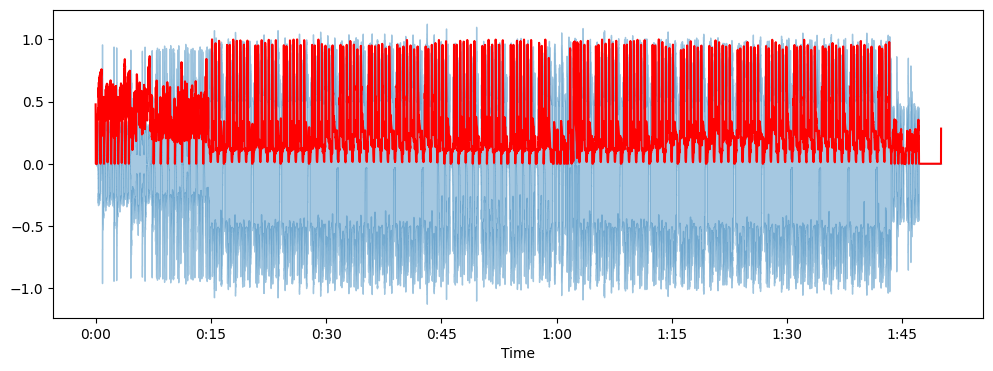

In [26]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
pyplot.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
pyplot.plot(t, normalize(spectral_rolloff), color='r')

In [27]:
normalize(spectral_rolloff).shape

(9480,)

In [28]:
# Spectral Bandwidth

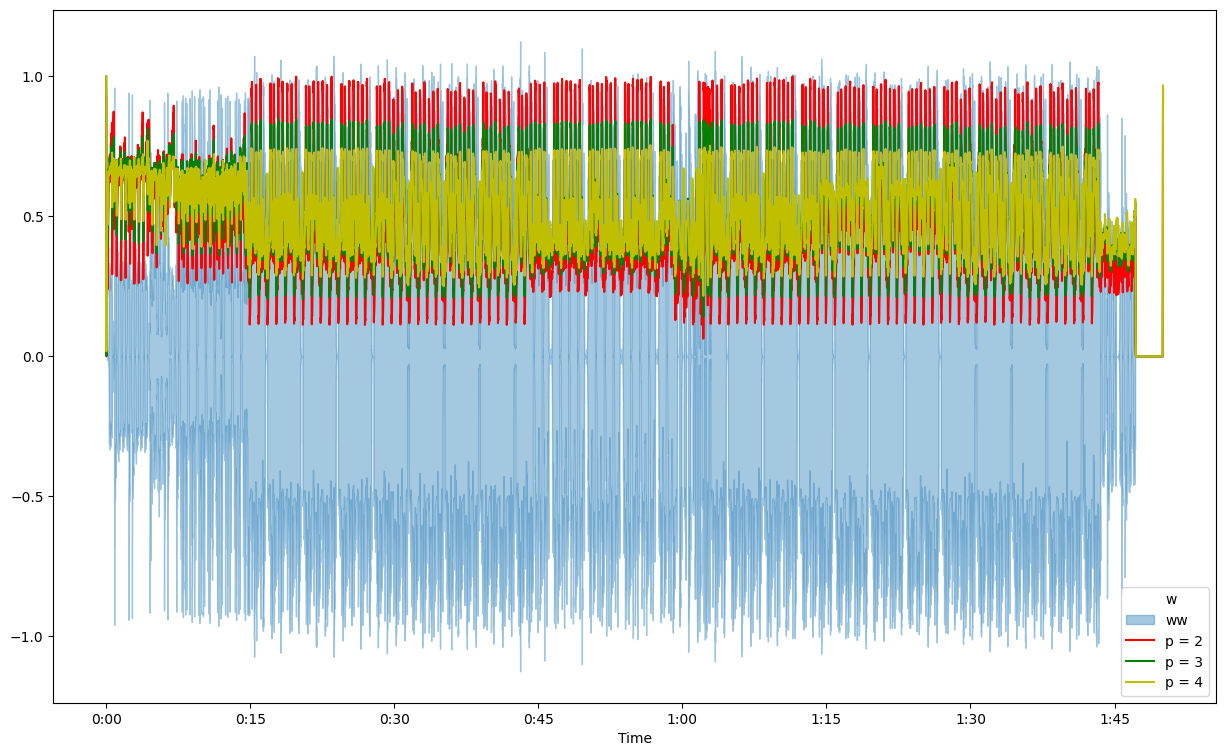

In [29]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
pyplot.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
pyplot.plot(t, normalize(spectral_bandwidth_2), color='r')
pyplot.plot(t, normalize(spectral_bandwidth_3), color='g')
pyplot.plot(t, normalize(spectral_bandwidth_4), color='y')
pyplot.legend(('w', 'ww', 'p = 2', 'p = 3', 'p = 4'))

In [30]:
# Zero Crossing Rate

In [31]:
zero_crossings = librosa.zero_crossings(y=x, pad=False)
zero_crossings

array([False, False, False, ..., False, False, False])

In [32]:
zero_crossings.shape

(4853646,)

In [33]:
sum(zero_crossings) / x.shape[0]

0.03801636954981884

In [34]:
x.shape

(4853646,)

In [35]:
# Mel-Frequency Cepstral Coefficients

In [36]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 9480)


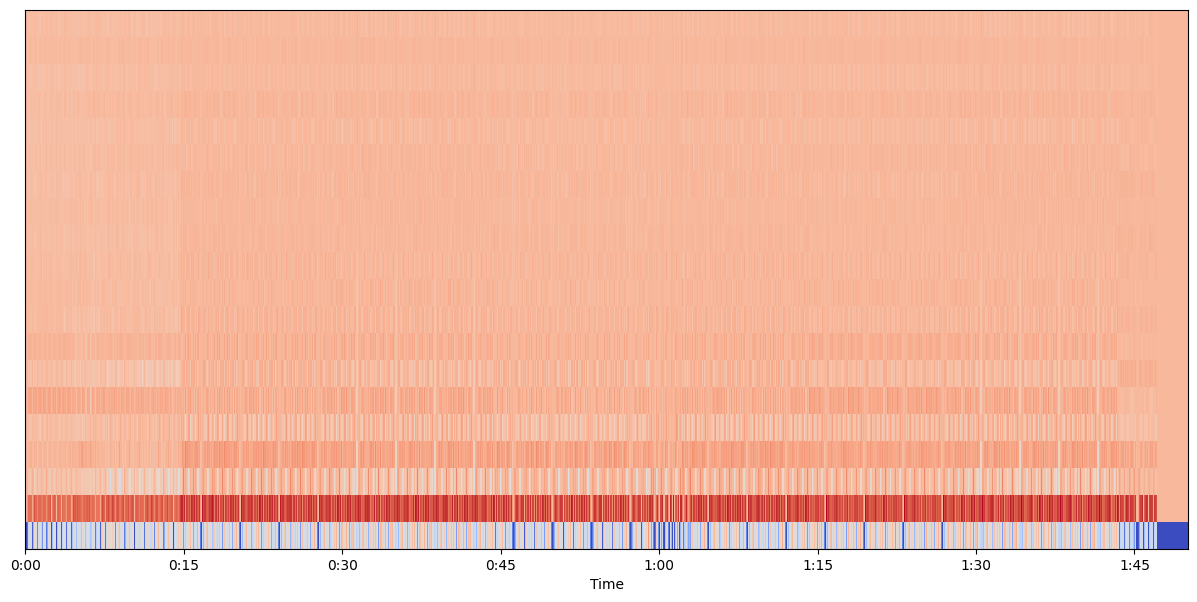

In [37]:
#Displaying  the MFCCs:
pyplot.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [38]:
mfccs.shape

(20, 9480)

In [39]:
mfccs10 = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=5)
print(mfccs10.shape)

(5, 9480)


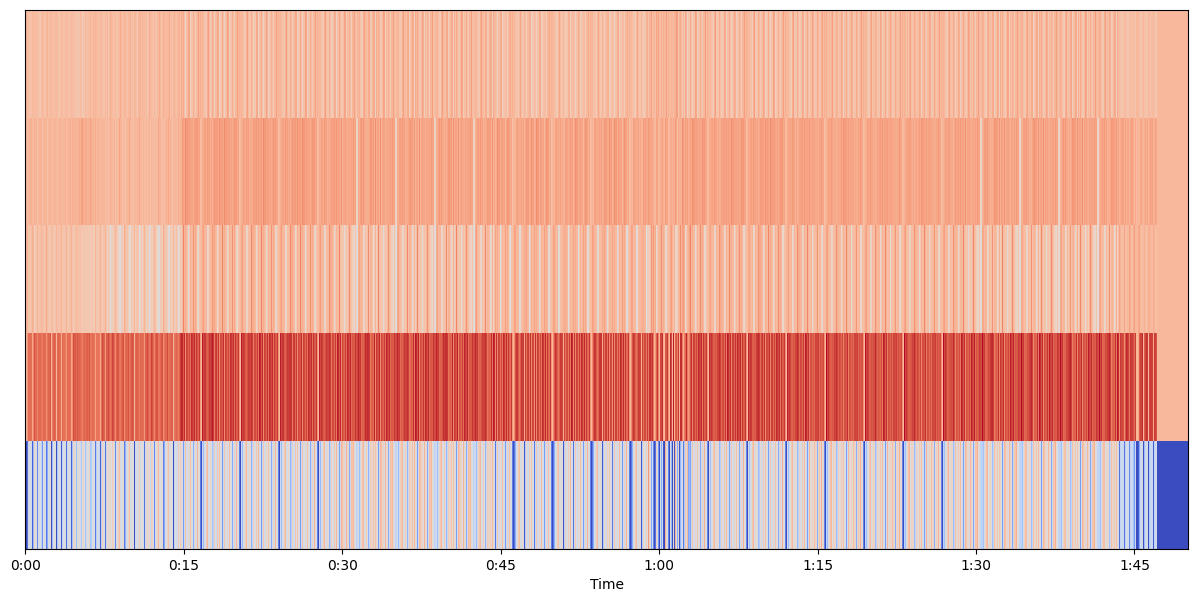

In [40]:
#Displaying  the MFCCs:
pyplot.figure(figsize=(15, 7))
librosa.display.specshow(mfccs10, sr=sr, x_axis='time')

In [41]:
# Chroma Feature

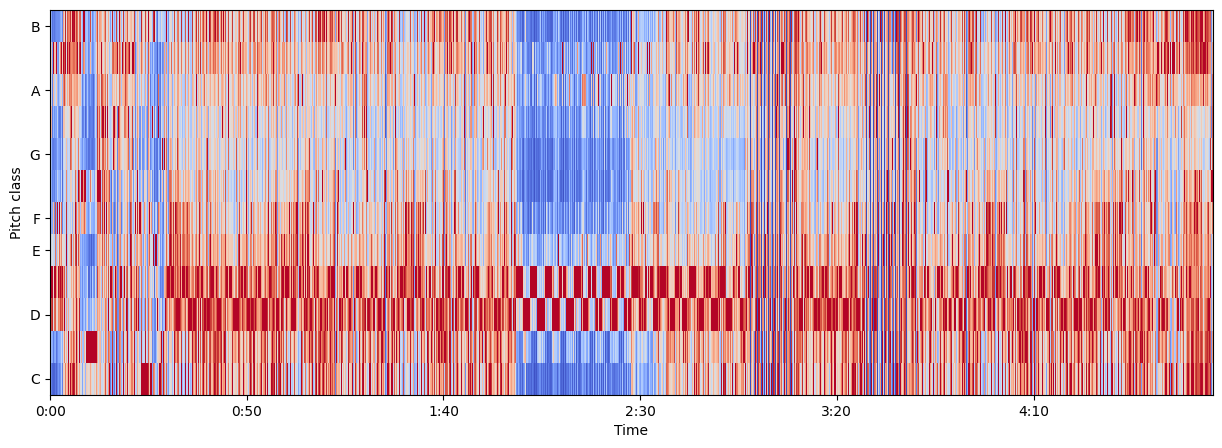

In [28]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
# pyplot.figure(figsize=(15, 5))
fig, ax = pyplot.subplots(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=ax)

In [43]:
chromagram.shape

(12, 9480)

3175200.0

In [55]:
sr

44100

In [96]:
xx.shape

(1025, 12727)

In [94]:
pandas.DataFrame(chromagram).to_csv('./Z_{0}.csv'.format(1), index=False)

In [95]:
pandas.read_csv('./Z_{0}.csv'.format(1)).values.shape

(12, 12727)

In [6]:
x_s, sr_s, xx_s, xxdb_s, spectral_centroids_s, spectral_rolloff_s = [], [], [], [], [], []
spectral_bandwidth_2_s, spectral_bandwidth_3_s, spectral_bandwidth_4_s = [], [], []
zero_crossings_s, mfccs_s, mfccs10_s, chromagram_s = [], [], [], []
with torch.no_grad():
    for j in range(len(listed)):
        print('{0} / {1}'.format(j, len(listed)))
        audio_data = listed[j]
        x, sr = librosa.load(audio_data, sr=None)

        xx = librosa.stft(x)
        xxdb = librosa.amplitude_to_db(abs(xx))

        spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

        spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]

        zero_crossings = librosa.zero_crossings(y=x, pad=False)

        mfccs = librosa.feature.mfcc(y=x, sr=sr)
        mfccs10 = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=5)

        chromagram = librosa.feature.chroma_stft(y=x, sr=sr)

        x_s.append(x)
        sr_s.append(sr)
        xx_s.append(xx)
        xxdb_s.append(xxdb)
        spectral_centroids_s.append(spectral_centroids)
        spectral_rolloff_s.append(spectral_rolloff)
        spectral_bandwidth_2_s.append(spectral_bandwidth_2)
        spectral_bandwidth_3_s.append(spectral_bandwidth_3)
        spectral_bandwidth_4_s.append(spectral_bandwidth_4)
        zero_crossings_s.append(zero_crossings)
        mfccs_s.append(mfccs)
        mfccs10_s.append(mfccs10)
        chromagram_s.append(chromagram)


0 / 4
1 / 4
2 / 4
3 / 4


In [7]:
def multivariate_calculator(var1, var2, measure, multi_agg_func):
    if len(var1.shape) != len(var2.shape):
        raise Exception()
    if len(var1.shape) == 1:
        var1 = var1.reshape(-1, 1)
        var2 = var2.reshape(-1, 1)
    measured = []
    for j in range(var1.shape[1]):
        m = measure(var1[:, j], var2[:, j])
        measured.append(m)
    measured_agg = multi_agg_func(measured)
    return measured_agg


In [8]:
def dtw_kt(x1, x2):
    gg = librosa.sequence.dtw(X=x1, Y=x2)
    y1, y2 = [], []
    for j in range(gg[1][:, 1].shape[0]):
        y1.append(x1[gg[1][:, 0][j]])
        y2.append(x2[gg[1][:, 1][j]])
    lx = pandas.DataFrame(data={'y1': y1, 'y2': y2})
    result = kendalltau(x=lx['y1'].values, y=lx['y2'].values)[0]
    return result

In [182]:
numpy.mean([dtw_kt(x1=chromagram_s[0][j, :], x2=chromagram_s[1][j, :]) for j in range(chromagram.shape[0])])

0.7647600692702893

In [231]:
multivariate_calculator(var1=chromagram_s[1], var2=chromagram_s[0], measure=dtw_kt, multi_agg_func=numpy.mean)

IndexError: index 7106 is out of bounds for axis 1 with size 7106

In [194]:
multivariate_calculator(var1=spectral_centroids_s[0], var2=spectral_centroids_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)

0.6773329077468502

In [204]:
import time
# current_time = time.time()
# print('xxdb')
# xxdb_z = multivariate_calculator(var1=xxdb_s[0].T, var2=xxdb_s[1].T, measure=dtw_kt, multi_agg_func=numpy.mean)
# run_time = time.time() - current_time
# print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('spectral_centroids')
spectral_centroids_z = multivariate_calculator(var1=spectral_centroids_s[0], var2=spectral_centroids_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('spectral_rolloff')
spectral_rolloff_z = multivariate_calculator(var1=spectral_rolloff_s[0], var2=spectral_rolloff_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('spectral_bandwidth_2')
spectral_bandwidth_2_z = multivariate_calculator(var1=spectral_bandwidth_2_s[0], var2=spectral_bandwidth_2_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('spectral_bandwidth_3')
spectral_bandwidth_3_z = multivariate_calculator(var1=spectral_bandwidth_3_s[0], var2=spectral_bandwidth_3_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('spectral_bandwidth_4')
spectral_bandwidth_4_z = multivariate_calculator(var1=spectral_bandwidth_4_s[0], var2=spectral_bandwidth_4_s[1], measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('zero_crossings')
zero_crossings_z = abs(abs(sum(zero_crossings_s[0]) / zero_crossings_s[0].shape[0]) - abs(sum(zero_crossings_s[1]) / zero_crossings_s[1].shape[0]))
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('mfccs')
mfccs_z = multivariate_calculator(var1=mfccs_s[0].T, var2=mfccs_s[1].T, measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('mfccs10')
mfccs10_z = multivariate_calculator(var1=mfccs10_s[0].T, var2=mfccs10_s[1].T, measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))
current_time = time.time()
print('chromagram')
chromagram_z = multivariate_calculator(var1=chromagram_s[0].T, var2=chromagram_s[1].T, measure=dtw_kt, multi_agg_func=numpy.mean)
run_time = time.time() - current_time
print('run time: {0} s'.format(int(run_time)))

spectral_centroids
run time: 1 s
spectral_rolloff
run time: 1 s
spectral_bandwidth_2
run time: 1 s
spectral_bandwidth_3
run time: 4 s
spectral_bandwidth_4
run time: 2 s
zero_crossings
run time: 0 s
mfccs
run time: 32 s
mfccs10
run time: 7 s
chromagram
run time: 19 s


In [9]:
corr_spectral_centroids = numpy.full(shape=(len(x_s), len(x_s)), fill_value=numpy.nan)
for i in range(len(x_s)):
    print('{0} / {1}'.format(i, len(x_s)))
    for j in range(len(x_s)):
        spectral_centroids_z = multivariate_calculator(var1=spectral_centroids_s[i], var2=spectral_centroids_s[j], measure=dtw_kt, multi_agg_func=numpy.mean)
        corr_spectral_centroids[i, j] = spectral_centroids_z
corr_spectral_centroids

0 / 4
1 / 4



KeyboardInterrupt



In [ ]:
#####

In [10]:
corr_chromagram = numpy.full(shape=(len(x_s), len(x_s)), fill_value=numpy.nan)
for i in range(len(x_s)):
    print('{0} / {1}'.format(i, len(x_s)))
    for j in range(len(x_s)):
        chromagram_z = multivariate_calculator(var1=chromagram_s[i].T, var2=chromagram_s[j].T, measure=dtw_kt, multi_agg_func=numpy.mean)
        corr_chromagram[i, j] = chromagram_z
corr_chromagram

0 / 4
1 / 4
2 / 4
3 / 4


array([[1.        , 0.76476007, 0.69818587, 0.73240965],
       [0.76476007, 1.        , 0.69503899, 0.74804317],
       [0.69818587, 0.69503899, 1.        , 0.72264561],
       [0.73240965, 0.74804317, 0.72264561, 1.        ]])

In [13]:
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(corr_chromagram)

HDBSCAN(metric='precomputed')

In [16]:
predicted_hdbscan = clusterer.labels_
predicted_hdbscan

array([-1, -1, -1, -1], dtype=int64)

In [20]:
clusterer = AgglomerativeClustering(metric='precomputed', linkage='complete')
clusterer.fit(corr_chromagram)

AgglomerativeClustering(linkage='complete', metric='precomputed')

In [22]:
predicted_agglo = clusterer.fit_predict(corr_chromagram)
predicted_agglo

array([0, 1, 1, 0], dtype=int64)

In [23]:
listed

['C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\0poLsDf1TvM.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\9gM7FUXeIb0.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\sKqfeWQOOZk.mp3',
 'C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\xLeGykSUFdY.mp3']

In [234]:
chromagram_s[2].shape

(12, 18813)

In [198]:
zero_crossings_s[0].shape

(3638250,)

In [151]:
gg = librosa.sequence.dtw(X=spectral_centroids_s[0], Y=spectral_centroids_s[1])
len(gg)

2

In [152]:
gg[1].shape

(13241, 2)

In [153]:
gg[0].shape

(7106, 9480)

In [150]:
gg

(array([[6419.64888671]]), array([[0, 0]]))

<Axes: >

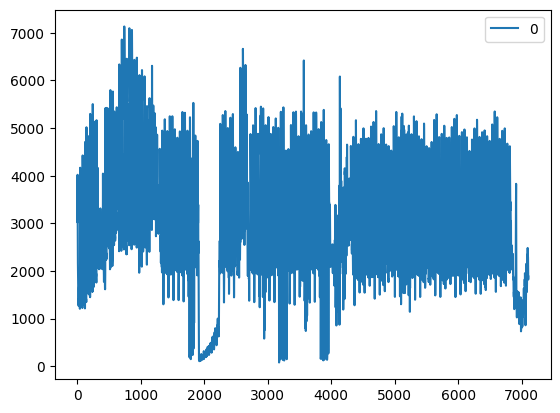

In [155]:
pandas.DataFrame(spectral_centroids_s[0].T).plot()

<Axes: >

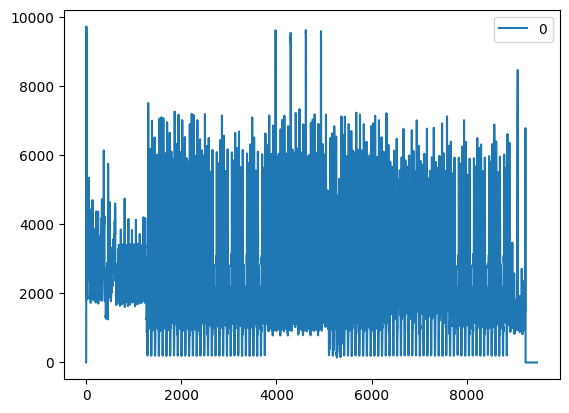

In [156]:
pandas.DataFrame(spectral_centroids_s[1].T).plot()

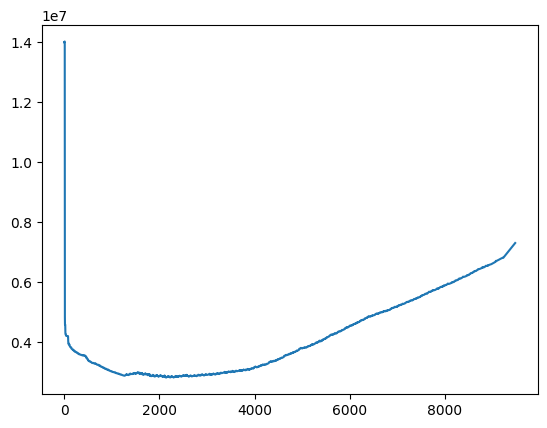

In [154]:
pyplot.plot(range(len(gg[0][5000, :])), gg[0][5000, :])

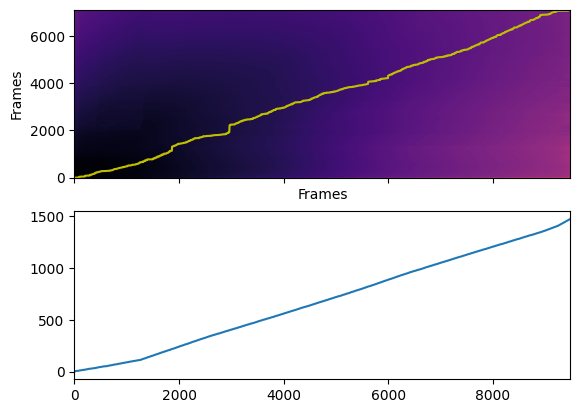

In [158]:
fig, ax = pyplot.subplots(nrows=2, sharex=True)

img = librosa.display.specshow(gg[0], x_axis='frames', y_axis='frames', ax=ax[0])
ax[0].plot(gg[1][:, 1], gg[1][:, 0], label='Optimal path', color='y')
ax[1].plot(gg[0][0, :] / gg[1].shape[0])

In [161]:
gg[1][:, 1]

array([9479, 9478, 9477, ...,    2,    1,    0])

In [162]:
gg[1][:, 0]

array([7105, 7104, 7103, ...,    1,    0,    0])

In [164]:
numpy.mean([(spectral_centroids_s[1][gg[1][:, 1][j]] - spectral_centroids_s[0][gg[1][:, 0][j]]) ** 2 for j in range(gg[1][:, 1].shape[0])])

665475.3111028675

In [166]:
x1, x2 = [], []
for j in range(gg[1][:, 1].shape[0]):
    x1.append(spectral_centroids_s[0][gg[1][:, 0][j]])
    x2.append(spectral_centroids_s[1][gg[1][:, 1][j]])
lx = pandas.DataFrame(data={'x1': x1, 'x2': x2})
lx

x1           x2
0      1885.018927     0.000000
1      1820.359142     0.000000
2      2019.206319     0.000000
3      2019.067012     0.000000
4      2242.839261     0.000000
...            ...          ...
13236  3991.377470  9463.820245
13237  3991.377470  8417.717504
13238  3991.377470  8550.878288
13239  3694.541177     0.000000
13240  3694.541177     0.000000

[13241 rows x 2 columns]

In [172]:
kendalltau(x=lx['x1'].values, y=lx['x2'].values)[0]

0.6773329077468502

<Axes: >

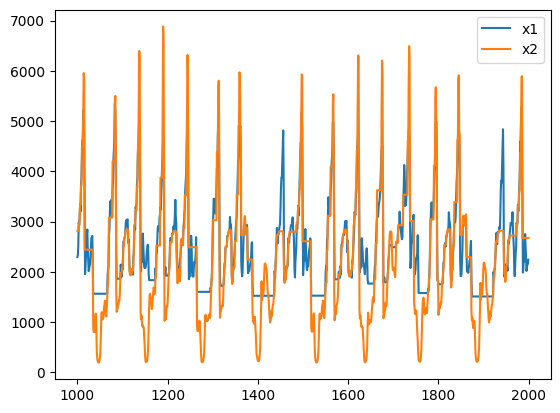

In [168]:
lx.iloc[1000:2000].plot()

In [163]:
spectral_centroids_s[0].shape

(7106,)

In [110]:
x_s[1].shape

(4853646,)

In [111]:
xxdb_s[0].shape

(1025, 7106)

In [112]:
xxdb_s[1].shape

(1025, 9480)

In [62]:

r

1.1458333333333333

In [63]:
# THAT"S THE WAY HOW YOU CAN ALIGN THE LENGTHS

In [103]:
l_bench = int(1.20 * 60 * 44100)
print(l_bench)

j = 0
r = x_s[j].shape[0] / l_bench
srx = 44100 / r
audio_data = listed[j]
x, sr = librosa.load(audio_data, sr=srx)
x = x[:l_bench]
print(x.shape)
print(sr)

(3175200,)
38487.27272727273


In [71]:
x_s[0].shape[0]

3638250

In [50]:
dex = pandas.DataFrame(data={'n': range(x_s[0].shape[0]), 'v': x_s[0]})

dex['nn'] = dex['n'] // 

n         v
0              0  0.000000
1              1  0.000000
2              2  0.000000
3              3  0.000000
4              4  0.000000
...          ...       ...
3638245  3638245 -0.002811
3638246  3638246 -0.003716
3638247  3638247 -0.003045
3638248  3638248 -0.003519
3638249  3638249 -0.003195

[3638250 rows x 2 columns]

In [48]:
x_s[1].shape

(4853646,)

In [55]:
produced_torch = numpy.concatenate(produced, axis=0)
produced_torch

array([[1.5371997e-02, 1.0972545e-01, 1.3725203e-01, ..., 1.2266288e-01,
        9.9623628e-02, 1.7295795e-02],
       [4.4067204e-03, 1.9124188e-01, 3.1478509e-01, ..., 4.1927788e-02,
        4.9316045e-02, 0.0000000e+00],
       [2.1826476e-03, 6.4849190e-02, 4.7091493e-01, ..., 1.9349930e-01,
        4.7152691e-02, 0.0000000e+00],
       ...,
       [2.7820806e-04, 1.2472189e-01, 3.4720165e-01, ..., 3.5310555e-01,
        9.0319857e-02, 0.0000000e+00],
       [9.2100352e-03, 1.6309668e-01, 1.4846559e-01, ..., 2.5956732e-01,
        5.0027955e-02, 1.4102048e-02],
       [2.6054129e-03, 1.4765893e-01, 4.1977856e-02, ..., 6.7099027e-02,
        7.4386694e-02, 0.0000000e+00]], dtype=float32)

In [56]:
produced_torch.shape

(806, 1024)

In [57]:
import umap
import hdbscan

In [58]:
mapper = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

clusterable_embedding = mapper.fit_transform(produced_torch)

C:\Users\Edward\Desktop\music_env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [62]:
scanner_hdbscan = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
)

labels_hdbscan = scanner_hdbscan.fit_predict(clusterable_embedding)

In [69]:
scanner_kmeans = cluster.KMeans(n_clusters=6)

labels_kmeans = scanner_kmeans.fit_predict(clusterable_embedding)

In [70]:
data = pandas.DataFrame(data=clusterable_embedding, columns=['x1', 'x2'])
data['labels_hdbscan'] = labels_hdbscan
data['labels_kmeans'] = labels_kmeans
data['id'] = idss
data['path'] = paths
data['vs'] = vs
data

x1         x2  labels_hdbscan  labels_kmeans id  \
0    8.167652  20.324039              -1              3      
1    9.763319  20.364193              -1              3      
2    7.932341  20.323944              -1              3      
3    9.856360  20.285425              -1              3      
4    9.790640  20.604542              -1              3      
..        ...        ...             ...            ... ..   
801  6.395244  20.584293              -1              3      
802  6.387815  20.592772              -1              3      
803  6.479369  20.576578              -1              3      
804  9.402470  19.358154              -1              3      
805  9.914302  10.214413              -1              0      

                                                  path  vs  
0    C:\Users\Edward\Desktop\music\data_mp3\-PVZWsC...   0  
1    C:\Users\Edward\Desktop\music\data_mp3\0j7_Tb4...   0  
2    C:\Users\Edward\Desktop\music\data_mp3\0poLsDf...   0  
3    C:\Users\Edward\Desktop\music\data_mp3\1AfkQES...   1  
4    C:\Users\Edward\Desktop\music\data_mp3\1AfkQES...  10  
..                                                 ...  ..  
801  C:\Users\Edward\Desktop\music\data_mp3\z0jOyz2...   8  
802  C:\Users\Edward\Desktop\music\data_mp3\z0jOyz2...   9  
803  C:\Users\Edward\Desktop\music\data_mp3\zeYu80u...   0  
804  C:\Users\Edward\Desktop\music\data_mp3\ZSmJVeu...   0  
805  C:\Users\Edward\Desktop\music\data_mp3\zTpycqG...   1  

[806 rows x 7 columns]

<Axes: xlabel='x1', ylabel='x2'>

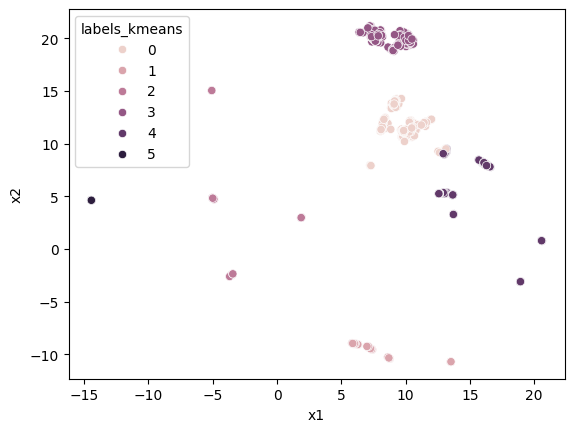

In [71]:
seaborn.scatterplot(data=data, x="x1", y="x2", hue="labels_kmeans")

In [72]:
data[data['labels_kmeans'] == 2]

x1        x2  labels_hdbscan  labels_kmeans id  \
330 -5.019726  4.846660              -1              2      
331 -4.963316  4.790059              -1              2      
332 -5.011189  4.838051              -1              2      
333 -4.943319  4.770009              -1              2      
334 -4.987681  4.814665              -1              2      
..        ...       ...             ...            ... ..   
621  1.892259  2.995041              -1              2      
622  1.900539  3.004099              -1              2      
623  1.882574  2.986000              -1              2      
624  1.861348  2.964662              -1              2      
625  1.878289  2.981642              -1              2      

                                                  path  vs  
330  C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...   1  
331  C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...  10  
332  C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...  11  
333  C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...  12  
334  C:\Users\Edward\Desktop\music\data_mp3\gBZi2w1...  13  
..                                                 ...  ..  
621  C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...   5  
622  C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...   6  
623  C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...   7  
624  C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...   8  
625  C:\Users\Edward\Desktop\music\data_mp3\QlXrndl...   9  

[73 rows x 7 columns]

In [73]:
data.to_excel('labeled.xlsx')

In [23]:
dataset[0]["audio"]["path"]

'C:/Users/Edward/.cache/huggingface/datasets/downloads/extracted/5bcdfe32bf897be9d35b8459d665a1979e1388392378913b3c587390c05864c3/dev_clean/1272/128104\\1272-128104-0000.flac'

In [24]:
dataset[0]['id']

'1272-128104-0000'

In [25]:
listed[2]

'C:\\Users\\Edward\\Desktop\\music\\data_sub_mp3\\sKqfeWQOOZk.mp3'

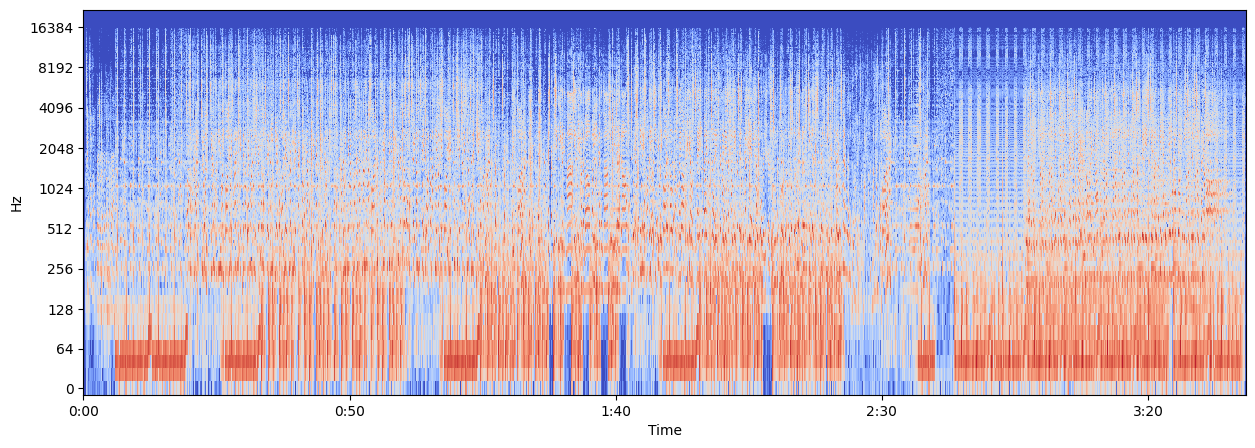

In [180]:
audio_data = listed[2]
x, sr = librosa.load(audio_data, sr=None)

chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
# pyplot.figure(figsize=(15, 5))
fig, ax = pyplot.subplots(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=ax)

xx = librosa.stft(x)
xxdb = librosa.amplitude_to_db(abs(xx))
librosa.display.specshow(xxdb, sr=sr, x_axis='time', y_axis='log')

fig.canvas.draw()
img_plot = numpy.array(fig.canvas.renderer.buffer_rgba())

# cv2.imshow('Image', cv2.cvtColor(img_plot, cv2.COLOR_RGBA2BGR))
image1 = cv2.imread('Image', cv2.cvtColor(img_plot, cv2.COLOR_RGBA2BGR))

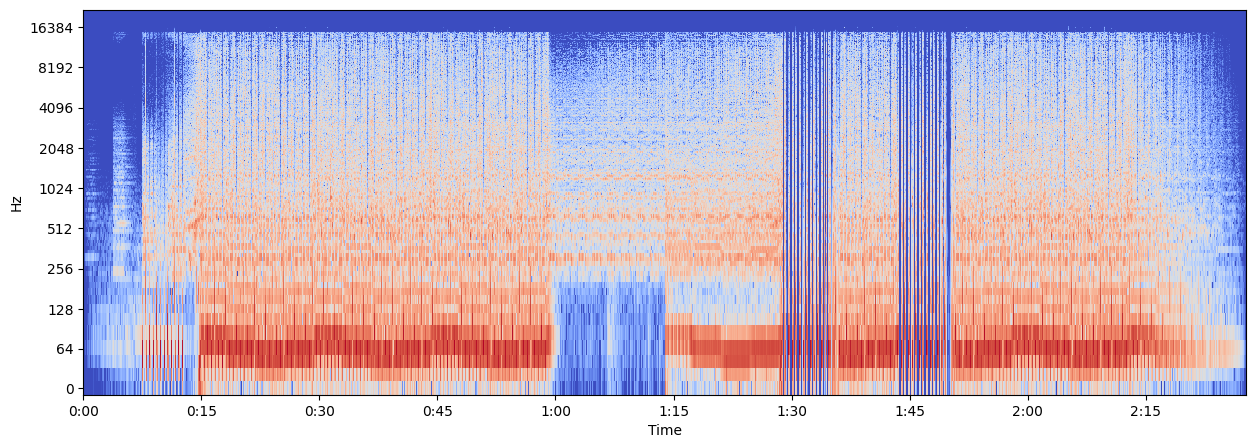

In [181]:
audio_data = listed[3]
x, sr = librosa.load(audio_data, sr=None)

chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
# pyplot.figure(figsize=(15, 5))
fig, ax = pyplot.subplots(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=ax)

xx = librosa.stft(x)
xxdb = librosa.amplitude_to_db(abs(xx))
librosa.display.specshow(xxdb, sr=sr, x_axis='time', y_axis='log')

fig.canvas.draw()
img_plot = numpy.array(fig.canvas.renderer.buffer_rgba())

# cv2.imshow('Image', cv2.cvtColor(img_plot, cv2.COLOR_RGBA2BGR))
image2 = cv2.imread('Image', cv2.cvtColor(img_plot, cv2.COLOR_RGBA2BGR))

In [182]:
msssim(image1, image2)

(0.5128854715915149+0j)

In [25]:
hist_img1 = cv2.calcHist([image1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img1[255, 255, 255] = 0 #ignore all white pixels
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_img2 = cv2.calcHist([image2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
hist_img2[255, 255, 255] = 0  #ignore all white pixels
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
# Find the metric value
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)
print(f"Similarity Score: ", round(metric_val, 2))

Similarity Score:  0.91


In [37]:
from skimage import metrics
# Load images
print(image1.shape, image2.shape)
# Convert images to grayscale
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Calculate SSIM
ssim_score = metrics.structural_similarity(image1_gray, image2_gray, full=True)
print(f"SSIM Score: ", round(ssim_score[0], 2))

(500, 1500, 3) (500, 1500, 3)
SSIM Score:  0.42


In [78]:
from sewar.full_ref import rmse, psnr, ssim, uqi, msssim, ergas, scc, rase, sam

In [152]:
rmse(image1, image2)

47.158012284941215

In [162]:
ssim(image1, image2)

(0.45313364714156784, 0.4541263332104129)

In [153]:
psnr(image1, image2)

14.659693783642368

In [158]:
uqi(image1, image2)

0.9433851925735661

In [165]:
msssim(image1, image2)

(0.5105836599664418+0j)

In [127]:
ergas(image1, image2)

8.812945020887595

In [137]:
scc(image1, image2)

0.03509486210763062

In [144]:
rase(image1, image2)

2073.422371662202

In [147]:
sam(image1, image2)

0.33701262357937173